# Support Vector Machines

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [11]:
iris = load_iris()
x = iris['data'][:,(2,3)]           # selecting petal length Petal Width
y = iris['target']

setsa_or_versicolor = (y==0) | (y==1)
y = y[setsa_or_versicolor]
x = x[setsa_or_versicolor]

svc_clf = SVC(kernel = 'linear', C = float('inf'))
svc_clf.fit(x,y)

SVC(C=inf, kernel='linear')

In [26]:
svc_clf.coef_[0], svc_clf.intercept_[0]

(array([1.29411744, 0.82352928]), -3.7882347112962464)

In [27]:
 svc_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [18]:
import numpy as np
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 +0.5

def plot_svc_decision_boundry(svm_clf,xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x0 = np.linspace(xmin,xmax,200)
    # at decision boundry w0*x0 +w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    decision_boundry = -w[0]/w[1]*x0 -b/w[1]
    
    margin = 1/w[1]
    up = decision_boundry + margin
    down = decision_boundry - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0], svs[:,1], s=180)
    plt.plot(x0, decision_boundry,'k-', lw = 2)
    plt.plot(x0, up,'k--', lw=2)
    plt.plot(x0, down,'k--', lw=2)

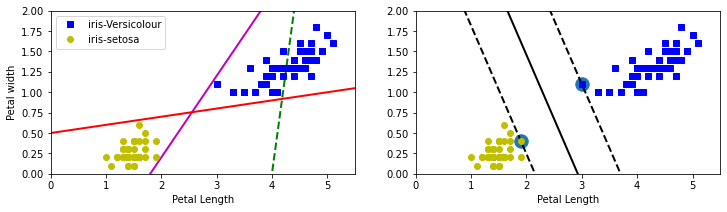

In [19]:
plt.figure(figsize = (12,3))

plt.subplot(121)
plt.plot(x0, pred_1, 'g--', lw = 2)
plt.plot(x0, pred_2, 'm-', lw = 2)
plt.plot(x0, pred_3, 'r-', lw = 2)

plt.plot(x[:,0][y==1],x[:,1][y==1], 'bs', label = 'iris-Versicolour')
plt.plot(x[:,0][y==0],x[:,1][y==0], 'yo', label = 'iris-setosa')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.legend(loc = 'upper left')
plt.axis([0,5.5,0,2])


plt.subplot(122)
plot_svc_decision_boundry(svc_clf,0,5.5)
plt.plot(x[:,0][y==1],x[:,1][y==1], 'bs', label = 'iris-Versicolour')
plt.plot(x[:,0][y==0],x[:,1][y==0], 'yo', label = 'iris-setosa')
plt.xlabel('Petal Length')
plt.axis([0,5.5,0,2])
plt.show()